In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import cv2
import os
import pickle
import random
import keras
import imageio

# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# baseline model with dropout for the dogs vs cats dataset
from keras.layers import Dropout

from keras.datasets import cifar10
#importing other required libraries
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.applications import VGG19 #For Transfer Learning
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.utils import to_categorical

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


# No Need

In [2]:
x1 = np.load('pannuke\\Fold_1\\images\\image1_converted.npy')
y1 = np.load('pannuke\\Fold_1\\images\\types.npy')

In [3]:
x2 = np.load('pannuke\\Fold_2\\images\\image2_converted.npy')
y2 = np.load('pannuke\\Fold_2\\images\\types.npy')

In [3]:
x2 = np.load('pannuke\\Fold_2\\images\\image2_converted.npy')
y2 = np.load('pannuke\\Fold_2\\images\\types.npy')

In [4]:
x = np.vstack((x1,x3))

In [5]:
x.shape


(5378, 224, 224, 3)

In [6]:
y = np.vstack((y1,y3))

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2656 and the array at index 1 has size 2722

In [9]:
y = np.append(y1, y3, axis=None)

In [10]:
y.shape

(5378,)

In [13]:
y

array(['Breast', 'Breast', 'Breast', ..., 'Colon', 'Colon', 'Colon'],
      dtype='<U13')

In [11]:
Y = np.concatenate((y1, y3))

In [12]:
Y.shape

(5378,)

In [14]:
Y

array(['Breast', 'Breast', 'Breast', ..., 'Colon', 'Colon', 'Colon'],
      dtype='<U13')

In [10]:
x = np.vstack((x12,x3))

MemoryError: Unable to allocate 8.86 GiB for an array with shape (7901, 224, 224, 3) and data type float64

In [ ]:
x.shape

In [6]:
X = np.hstack((x1,x2))

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 2656 and the array at index 1 has size 2523

In [24]:
np.save('pannuke/train_images.npy', x)

In [25]:
np.save('pannuke/train_types.npy', y)

In [ ]:
history = model.fit(X, y, verbose = 0,
                    validation_split = 0.2, # split your data in 80-20 train-test sets
                    epochs = 600,
                    batch_size = 128)

# start here

In [2]:
x = np.load('pannuke/train_images.npy')
y = np.load('pannuke/train_types.npy')

x.shape, y.shape

((5378, 224, 224, 3), (5378,))

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val  = train_test_split(x, y, test_size=0.20, random_state=42)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((4302, 224, 224, 3), (1076, 224, 224, 3), (4302,), (1076,))

In [3]:
from sklearn.model_selection import train_test_split
x_val, x_train, y_val, y_train   = train_test_split(x, y, test_size=0.80, random_state=42)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((4303, 224, 224, 3), (1075, 224, 224, 3), (4303,), (1075,))

In [4]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# integer encode
label_encoder2 = LabelEncoder()
integer_encoded2 = label_encoder2.fit_transform(y_train)
print(integer_encoded2)

print(y_train)
# binary encode
onehot_encoder2 = OneHotEncoder(sparse=False)
integer_encoded2 = integer_encoded2.reshape(len(integer_encoded2), 1)
onehot_encoded2 = onehot_encoder2.fit_transform(integer_encoded2)
print(onehot_encoded2)

y_train = onehot_encoded2

[ 3  4  3 ...  5 17  3]
['Breast' 'Cervix' 'Breast' ... 'Colon' 'Thyroid' 'Breast']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# integer encode
label_encoder2 = LabelEncoder()
integer_encoded2 = label_encoder2.fit_transform(y_val)
print(integer_encoded2)

print(y_val)
# binary encode
onehot_encoder2 = OneHotEncoder(sparse=False)
integer_encoded2 = integer_encoded2.reshape(len(integer_encoded2), 1)
onehot_encoded2 = onehot_encoder2.fit_transform(integer_encoded2)
print(onehot_encoded2)

y_val = onehot_encoded2

[ 3 16  3 ... 18 18  5]
['Breast' 'Testis' 'Breast' ... 'Uterus' 'Uterus' 'Colon']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((4303, 224, 224, 3), (1075, 224, 224, 3), (4303, 19), (1075, 19))

# Try 1

In [7]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping

lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.6, patience=8, verbose=1, mode='max', min_lr=5e-5)
checkpoint = ModelCheckpoint('latest model22.h5', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)
early_stop = EarlyStopping(monitor='val_accuracy',verbose=1,patience=15,mode='max',restore_best_weights=True)

In [8]:
from keras.applications.imagenet_utils import preprocess_input


train_datagen = ImageDataGenerator(rotation_range = 5, 
                                   shear_range = 0.02,
                                   zoom_range = 0.02, 
                                   samplewise_center=True, 
                                   samplewise_std_normalization= True, 
                                   brightness_range=[0.1, 0.7],
                                   width_shift_range=0.5, 
                                   height_shift_range=0.5,
                                   horizontal_flip=True, 
                                   vertical_flip=True,
                                   rescale=1/255.,              # normalize pixel values between 0-1
                                   preprocessing_function=preprocess_input) # VGG16 preprocessing

train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
valid_generator = train_datagen.flow(x_val, y_val, batch_size=32)

#test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) # VGG16 preprocessing
#test_generator = test_datagen.flow(x_test, y_test, batch_size=32)

In [9]:
def create_model(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    """
    Compiles a model integrated with VGG16 pretrained layers
    
    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """
    
    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = VGG16(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)
    
    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(2048, activation='relu')(top_model)
    top_model = Dropout(0.5)(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [10]:
# Training Without Fine-Tuning

BATCH_SIZE =32
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.0001)
n_classes=19

#n_steps = train_generator // BATCH_SIZE
#n_val_steps = valid_generator // BATCH_SIZE
#n_epochs = 50

# First we'll train the model without Fine-tuning
vgg_model = create_model(input_shape, n_classes, optim_1, fine_tune=0)

In [11]:
# finAL run 2
vgg_history = vgg_model.fit(train_generator,
                            epochs=200,
                            validation_data=valid_generator,
                            callbacks=[lr_reduce, checkpoint, early_stop],
                            shuffle=True,
                            verbose=1)


Epoch 1/200
135/135 [==============================] - 57s 419ms/step - loss: 2.3964 - accuracy: 0.3459 - val_loss: 2.4591 - val_accuracy: 0.4219

Epoch 00001: val_accuracy improved from -inf to 0.42193, saving model to latest model22.h5
Epoch 2/200
135/135 [==============================] - 56s 418ms/step - loss: 2.0653 - accuracy: 0.4059 - val_loss: 2.0560 - val_accuracy: 0.4619

Epoch 00002: val_accuracy improved from 0.42193 to 0.46190, saving model to latest model22.h5
Epoch 3/200
135/135 [==============================] - 57s 424ms/step - loss: 1.9444 - accuracy: 0.4305 - val_loss: 2.0682 - val_accuracy: 0.4396

Epoch 00003: val_accuracy did not improve from 0.46190
Epoch 4/200
135/135 [==============================] - 57s 419ms/step - loss: 1.8800 - accuracy: 0.4498 - val_loss: 1.6722 - val_accuracy: 0.5177

Epoch 00004: val_accuracy improved from 0.46190 to 0.51766, saving model to latest model22.h5
Epoch 5/200
135/135 [==============================] - 57s 426ms/step - loss: 

135/135 [==============================] - 55s 405ms/step - loss: 1.1989 - accuracy: 0.6292 - val_loss: 1.6016 - val_accuracy: 0.6580

Epoch 00039: val_accuracy did not improve from 0.66078
Epoch 40/200
135/135 [==============================] - 55s 406ms/step - loss: 1.2005 - accuracy: 0.6313 - val_loss: 1.4529 - val_accuracy: 0.6506

Epoch 00040: val_accuracy did not improve from 0.66078
Epoch 41/200
135/135 [==============================] - 56s 412ms/step - loss: 1.1833 - accuracy: 0.6351 - val_loss: 1.7313 - val_accuracy: 0.6766

Epoch 00041: val_accuracy improved from 0.66078 to 0.67658, saving model to latest model22.h5
Epoch 42/200
135/135 [==============================] - 56s 412ms/step - loss: 1.1743 - accuracy: 0.6427 - val_loss: 0.9832 - val_accuracy: 0.6719

Epoch 00042: val_accuracy did not improve from 0.67658
Epoch 43/200
135/135 [==============================] - 56s 412ms/step - loss: 1.1628 - accuracy: 0.6406 - val_loss: 0.8530 - val_accuracy: 0.6849

Epoch 00043: v

135/135 [==============================] - 60s 443ms/step - loss: 0.7834 - accuracy: 0.7499 - val_loss: 1.0325 - val_accuracy: 0.7426

Epoch 00116: val_accuracy did not improve from 0.76487
Epoch 117/200
135/135 [==============================] - 56s 416ms/step - loss: 0.7700 - accuracy: 0.7608 - val_loss: 0.9953 - val_accuracy: 0.7537

Epoch 00117: val_accuracy did not improve from 0.76487
Epoch 118/200
135/135 [==============================] - 59s 435ms/step - loss: 0.7799 - accuracy: 0.7490 - val_loss: 1.0540 - val_accuracy: 0.7574

Epoch 00118: val_accuracy did not improve from 0.76487
Epoch 119/200
135/135 [==============================] - 56s 417ms/step - loss: 0.7706 - accuracy: 0.7543 - val_loss: 0.7436 - val_accuracy: 0.7435

Epoch 00119: val_accuracy did not improve from 0.76487
Epoch 120/200
135/135 [==============================] - 56s 414ms/step - loss: 0.7928 - accuracy: 0.7490 - val_loss: 0.6284 - val_accuracy: 0.7500

Epoch 00120: val_accuracy did not improve from 0.

Training Accuracy: 80.2%

Testing Accuracy: 78.9%

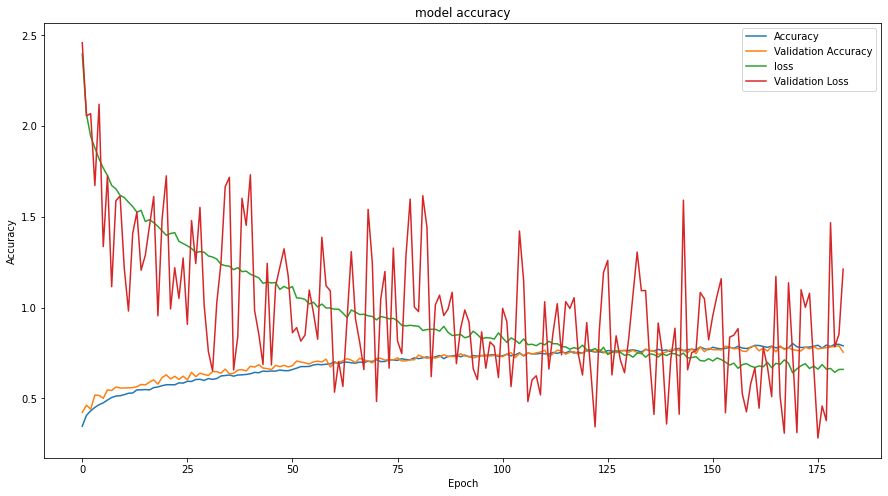

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(vgg_history.history["accuracy"])
plt.plot(vgg_history.history['val_accuracy'])
plt.plot(vgg_history.history['loss'])
plt.plot(vgg_history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

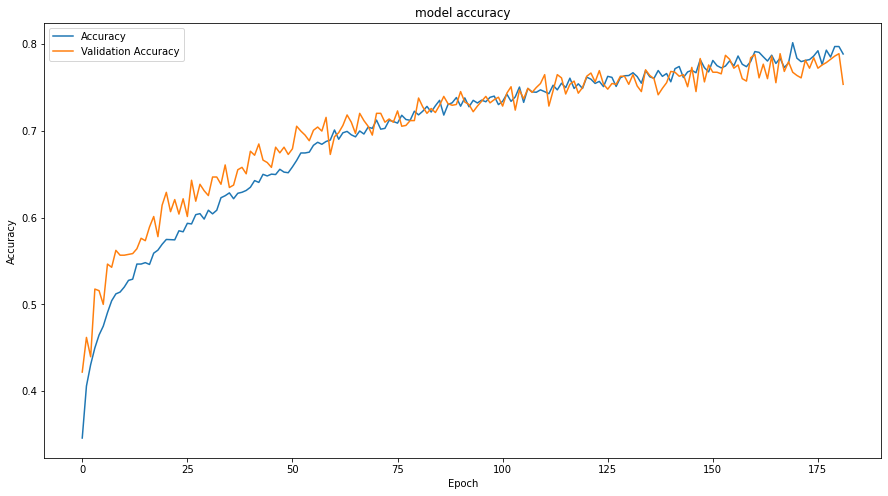

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(vgg_history.history["accuracy"])
plt.plot(vgg_history.history['val_accuracy'])
#plt.plot(vgg_history.history['loss'])
#plt.plot(vgg_history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

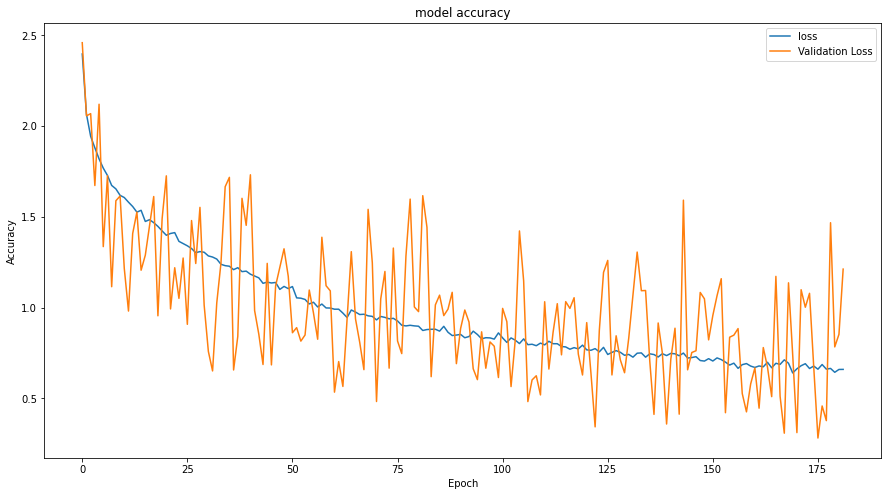

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
#plt.plot(vgg_history.history["accuracy"])
#plt.plot(vgg_history.history['val_accuracy'])
plt.plot(vgg_history.history['loss'])
plt.plot(vgg_history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

In [16]:
vgg_model.save("latest model22.h5")

In [17]:
x2 = np.load('pannuke\\Fold_2\\images\\image2_converted.npy')
y2 = np.load('pannuke\\Fold_2\\images\\types.npy')

In [18]:
x_test = np.load('pannuke\\Fold_2\\images\\image2_converted.npy')
y_test = np.load('pannuke\\Fold_2\\images\\types.npy')



In [19]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# integer encode
label_encoder2 = LabelEncoder()
integer_encoded2 = label_encoder2.fit_transform(y_test)
print(integer_encoded2)

print(y_test)
# binary encode
onehot_encoder2 = OneHotEncoder(sparse=False)
integer_encoded2 = integer_encoded2.reshape(len(integer_encoded2), 1)
onehot_encoded2 = onehot_encoder2.fit_transform(integer_encoded2)
print(onehot_encoded2)

y_test = onehot_encoded2

[3 3 3 ... 5 5 5]
['Breast' 'Breast' 'Breast' ... 'Colon' 'Colon' 'Colon']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [20]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) # VGG16 preprocessing
test_generator = test_datagen.flow(x_test, y_test, batch_size=32)

In [21]:
# Generate predictions
vgg_model.load_weights('latest model22.h5') # initialize the best trained weights


# Evaluate the model
loss, acc = vgg_model.evaluate(test_generator, verbose=1)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

79/79 [==============================] - 19s 243ms/step
Untrained model, accuracy: 65.16%


# 2nd Try

In [2]:
x = np.load('pannuke/train_images.npy')
y = np.load('pannuke/train_types.npy')

x.shape, y.shape

((5378, 224, 224, 3), (5378,))

In [3]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# integer encode
label_encoder2 = LabelEncoder()
integer_encoded2 = label_encoder2.fit_transform(y)
print(integer_encoded2)

print(y)
# binary encode
onehot_encoder2 = OneHotEncoder(sparse=False)
integer_encoded2 = integer_encoded2.reshape(len(integer_encoded2), 1)
onehot_encoded2 = onehot_encoder2.fit_transform(integer_encoded2)
print(onehot_encoded2)

y = onehot_encoded2

[3 3 3 ... 5 5 5]
['Breast' 'Breast' 'Breast' ... 'Colon' 'Colon' 'Colon']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping

lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.6, patience=8, verbose=1, mode='max', min_lr=5e-5)
checkpoint = ModelCheckpoint('latest model22 try2.h5', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)
early_stop = EarlyStopping(monitor='val_accuracy',verbose=1,patience=15,mode='max',restore_best_weights=True)

In [8]:
from keras.applications.imagenet_utils import preprocess_input


train_datagen = ImageDataGenerator(rotation_range = 5, 
                                   shear_range = 0.02,
                                   zoom_range = 0.02, 
                                   samplewise_center=True, 
                                   samplewise_std_normalization= True, 
                                   brightness_range=[0.1, 0.7],
                                   width_shift_range=0.5, 
                                   height_shift_range=0.5,
                                   horizontal_flip=True, 
                                   vertical_flip=True,
                                   rescale=1/255.,              # normalize pixel values between 0-1
                                   preprocessing_function=preprocess_input) # VGG16 preprocessing

train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
valid_generator = train_datagen.flow(x_val, y_val, batch_size=32)

#train_data = train_datagen.flow(x, y, batch_size=32)

#test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) # VGG16 preprocessing
#test_generator = test_datagen.flow(x_test, y_test, batch_size=32)

In [9]:
def create_model(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    """
    Compiles a model integrated with VGG16 pretrained layers
    
    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """
    
    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = VGG16(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)
    
    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(2048, activation='relu')(top_model)
    # top_model = Dropout(0.5)(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [10]:
# Training Without Fine-Tuning

BATCH_SIZE =32
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.0001)
n_classes=19

#n_steps = train_generator // BATCH_SIZE
#n_val_steps = valid_generator // BATCH_SIZE
#n_epochs = 50

# First we'll train the model without Fine-tuning
vgg_model = create_model(input_shape, n_classes, optim_1, fine_tune=0)

In [11]:
# finAL run 2
vgg_history = vgg_model.fit(train_generator,
                            epochs=200,
                            validation_data=valid_generator,
                            callbacks=[lr_reduce, checkpoint, early_stop],
                            shuffle=True,
                            verbose=1)


Epoch 1/200
135/135 [==============================] - 58s 430ms/step - loss: 2.2230 - accuracy: 0.3707 - val_loss: 1.8734 - val_accuracy: 0.4623

Epoch 00001: val_accuracy improved from -inf to 0.46233, saving model to latest model22 try2.h5
Epoch 2/200
135/135 [==============================] - 53s 392ms/step - loss: 1.8795 - accuracy: 0.4425 - val_loss: 1.3337 - val_accuracy: 0.5051

Epoch 00002: val_accuracy improved from 0.46233 to 0.50512, saving model to latest model22 try2.h5
Epoch 3/200
135/135 [==============================] - 56s 414ms/step - loss: 1.7397 - accuracy: 0.4906 - val_loss: 1.3550 - val_accuracy: 0.5488

Epoch 00003: val_accuracy improved from 0.50512 to 0.54884, saving model to latest model22 try2.h5
Epoch 4/200
135/135 [==============================] - 62s 461ms/step - loss: 1.6092 - accuracy: 0.5143 - val_loss: 2.1429 - val_accuracy: 0.5563

Epoch 00004: val_accuracy improved from 0.54884 to 0.55628, saving model to latest model22 try2.h5
Epoch 5/200
135/135


Epoch 00037: val_accuracy did not improve from 0.72558
Epoch 38/200
135/135 [==============================] - 59s 439ms/step - loss: 0.7590 - accuracy: 0.7537 - val_loss: 1.0093 - val_accuracy: 0.7153

Epoch 00038: val_accuracy did not improve from 0.72558
Epoch 39/200
135/135 [==============================] - 57s 419ms/step - loss: 0.7366 - accuracy: 0.7683 - val_loss: 1.0179 - val_accuracy: 0.7377

Epoch 00039: val_accuracy improved from 0.72558 to 0.73767, saving model to latest model22 try2.h5
Epoch 40/200
135/135 [==============================] - 55s 410ms/step - loss: 0.7088 - accuracy: 0.7767 - val_loss: 1.3069 - val_accuracy: 0.7451

Epoch 00040: val_accuracy improved from 0.73767 to 0.74512, saving model to latest model22 try2.h5
Epoch 41/200
135/135 [==============================] - 56s 415ms/step - loss: 0.7075 - accuracy: 0.7799 - val_loss: 1.5016 - val_accuracy: 0.7405

Epoch 00041: val_accuracy did not improve from 0.74512
Epoch 42/200
135/135 [======================

135/135 [==============================] - 54s 398ms/step - loss: 0.2800 - accuracy: 0.9122 - val_loss: 1.4830 - val_accuracy: 0.7953

Epoch 00114: val_accuracy did not improve from 0.83442
Epoch 115/200
135/135 [==============================] - 53s 396ms/step - loss: 0.2843 - accuracy: 0.9084 - val_loss: 0.6386 - val_accuracy: 0.8158

Epoch 00115: val_accuracy did not improve from 0.83442
Epoch 116/200
135/135 [==============================] - 54s 400ms/step - loss: 0.2999 - accuracy: 0.9050 - val_loss: 0.2507 - val_accuracy: 0.8233

Epoch 00116: val_accuracy did not improve from 0.83442
Epoch 117/200
135/135 [==============================] - 54s 402ms/step - loss: 0.2647 - accuracy: 0.9182 - val_loss: 0.7683 - val_accuracy: 0.8195

Epoch 00117: val_accuracy did not improve from 0.83442
Epoch 118/200
135/135 [==============================] - 54s 398ms/step - loss: 0.2855 - accuracy: 0.9084 - val_loss: 0.1641 - val_accuracy: 0.8363

Epoch 00118: val_accuracy improved from 0.83442 t

Training Accuracy: 92.2%

Validation accuracy: 83.6%

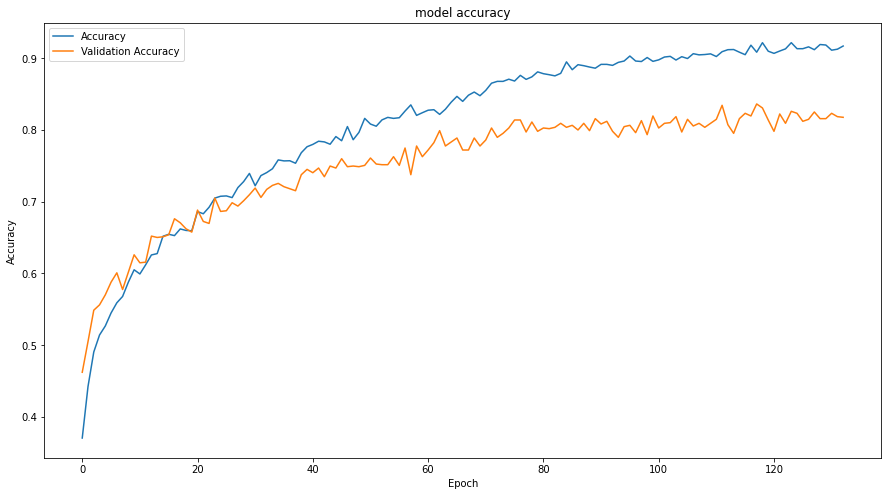

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(vgg_history.history["accuracy"])
plt.plot(vgg_history.history['val_accuracy'])
#plt.plot(vgg_history.history['loss'])
#plt.plot(vgg_history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

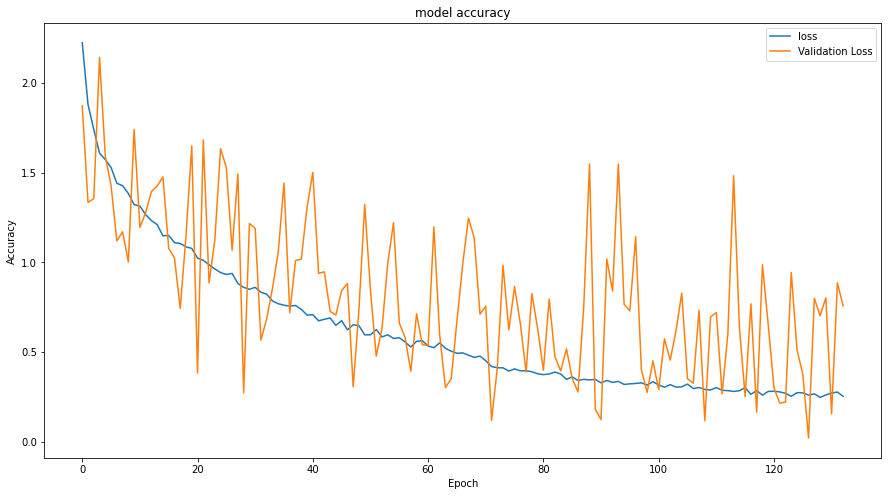

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
#plt.plot(vgg_history.history["accuracy"])
#plt.plot(vgg_history.history['val_accuracy'])
plt.plot(vgg_history.history['loss'])
plt.plot(vgg_history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

In [14]:
vgg_model.save("latest model22 try2.h5")

In [15]:
x_test = np.load('pannuke\\Fold_2\\images\\image2_converted.npy')
y_test = np.load('pannuke\\Fold_2\\images\\types.npy')

In [16]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# integer encode
label_encoder2 = LabelEncoder()
integer_encoded2 = label_encoder2.fit_transform(y_test)
print(integer_encoded2)

print(y_test)
# binary encode
onehot_encoder2 = OneHotEncoder(sparse=False)
integer_encoded2 = integer_encoded2.reshape(len(integer_encoded2), 1)
onehot_encoded2 = onehot_encoder2.fit_transform(integer_encoded2)
print(onehot_encoded2)

y_test = onehot_encoded2

[3 3 3 ... 5 5 5]
['Breast' 'Breast' 'Breast' ... 'Colon' 'Colon' 'Colon']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) # VGG16 preprocessing
test_generator = test_datagen.flow(x_test, y_test, batch_size=32)

In [18]:
# Generate predictions
vgg_model.load_weights('latest model22 try2.h5') # initialize the best trained weights


# Evaluate the model
loss, acc = vgg_model.evaluate(test_generator, verbose=1)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

79/79 [==============================] - 19s 242ms/step
Untrained model, accuracy: 67.90%


# 3rd try

In [7]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping

lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.6, patience=8, verbose=1, mode='max', min_lr=5e-5)
checkpoint = ModelCheckpoint('latest model22 try3.h5', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)
early_stop = EarlyStopping(monitor='val_accuracy',verbose=1,patience=15,mode='max',restore_best_weights=True)

In [8]:
from keras.applications.imagenet_utils import preprocess_input


train_datagen = ImageDataGenerator(rotation_range = 5, 
                                   shear_range = 0.02,
                                   zoom_range = 0.02, 
                                   samplewise_center=True, 
                                   samplewise_std_normalization= True, 
                                   brightness_range=[0.1, 0.7],
                                   width_shift_range=0.5, 
                                   height_shift_range=0.5,
                                   horizontal_flip=True, 
                                   vertical_flip=True,
                                   rescale=1/255.,              # normalize pixel values between 0-1
                                   preprocessing_function=preprocess_input) # VGG16 preprocessing

train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
valid_generator = train_datagen.flow(x_val, y_val, batch_size=32)


In [9]:
def create_model(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    """
    Compiles a model integrated with VGG16 pretrained layers
    
    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """
    
    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = VGG16(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)
    
    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(2048, activation='relu')(top_model)
    # top_model = Dropout(0.5)(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.5)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [10]:
# Training Without Fine-Tuning

BATCH_SIZE =32
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.0001)
n_classes=19


# First we'll train the model without Fine-tuning
vgg_model = create_model(input_shape, n_classes, optim_1, fine_tune=0)

# finAL run 2
vgg_history = vgg_model.fit(train_generator,
                            epochs=200,
                            validation_data=valid_generator,
                            callbacks=[lr_reduce, checkpoint, early_stop],
                            shuffle=True,
                            verbose=1)


Epoch 1/200
135/135 [==============================] - 58s 433ms/step - loss: 2.3299 - accuracy: 0.3484 - val_loss: 1.8806 - val_accuracy: 0.4577

Epoch 00001: val_accuracy improved from -inf to 0.45767, saving model to latest model22 try3.h5
Epoch 2/200
135/135 [==============================] - 53s 392ms/step - loss: 1.9913 - accuracy: 0.4167 - val_loss: 1.4575 - val_accuracy: 0.5135

Epoch 00002: val_accuracy improved from 0.45767 to 0.51349, saving model to latest model22 try3.h5
Epoch 3/200
135/135 [==============================] - 56s 414ms/step - loss: 1.8288 - accuracy: 0.4585 - val_loss: 1.6092 - val_accuracy: 0.5144

Epoch 00003: val_accuracy improved from 0.51349 to 0.51442, saving model to latest model22 try3.h5
Epoch 4/200
135/135 [==============================] - 56s 411ms/step - loss: 1.7511 - accuracy: 0.4762 - val_loss: 1.4905 - val_accuracy: 0.5358

Epoch 00004: val_accuracy improved from 0.51442 to 0.53581, saving model to latest model22 try3.h5
Epoch 5/200
135/135

135/135 [==============================] - 61s 453ms/step - loss: 0.5706 - accuracy: 0.8157 - val_loss: 0.5862 - val_accuracy: 0.7656

Epoch 00075: val_accuracy did not improve from 0.79256
Epoch 76/200
135/135 [==============================] - 66s 490ms/step - loss: 0.5732 - accuracy: 0.8187 - val_loss: 0.9117 - val_accuracy: 0.7712

Epoch 00076: val_accuracy did not improve from 0.79256
Epoch 77/200
135/135 [==============================] - 62s 457ms/step - loss: 0.5509 - accuracy: 0.8245 - val_loss: 0.8651 - val_accuracy: 0.7814

Epoch 00077: val_accuracy did not improve from 0.79256
Epoch 78/200
135/135 [==============================] - 66s 491ms/step - loss: 0.5485 - accuracy: 0.8273 - val_loss: 1.2703 - val_accuracy: 0.7767

Epoch 00078: val_accuracy did not improve from 0.79256
Epoch 79/200
135/135 [==============================] - 66s 488ms/step - loss: 0.5520 - accuracy: 0.8264 - val_loss: 0.6999 - val_accuracy: 0.7786

Epoch 00079: val_accuracy did not improve from 0.7925

Training Accuracy: 86.5%

Validation Accuracy: 81.2%

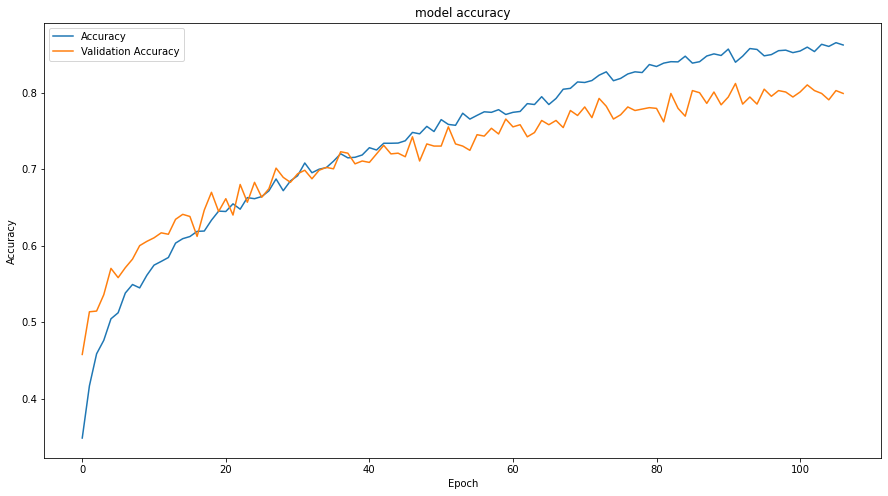

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(vgg_history.history["accuracy"])
plt.plot(vgg_history.history['val_accuracy'])
#plt.plot(vgg_history.history['loss'])
#plt.plot(vgg_history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

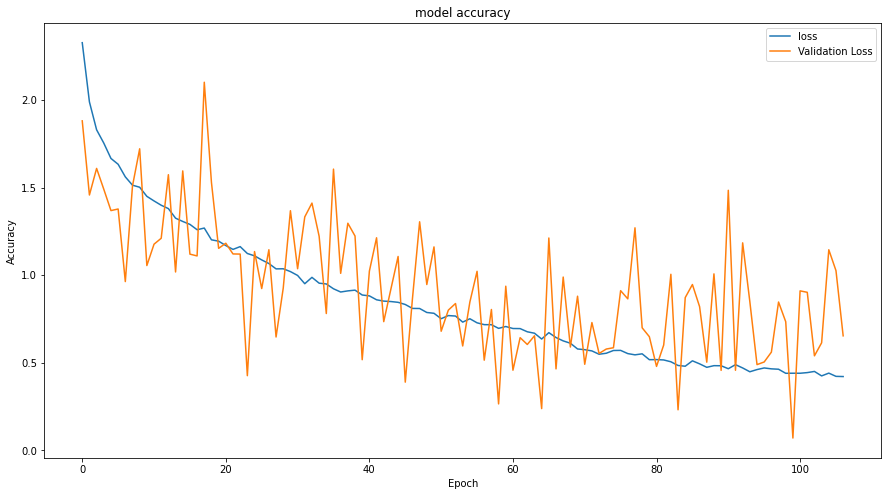

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
#plt.plot(vgg_history.history["accuracy"])
#plt.plot(vgg_history.history['val_accuracy'])
plt.plot(vgg_history.history['loss'])
plt.plot(vgg_history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

In [13]:
vgg_model.save("latest model22 try3.h5")

In [17]:
# Generate predictions
vgg_model.load_weights('latest model22 try3.h5') # initialize the best trained weights


# Evaluate the model
loss, acc = vgg_model.evaluate(test_generator, verbose=1)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

79/79 [==============================] - 19s 244ms/step
Untrained model, accuracy: 65.44%


In [19]:
_, acc = vgg_model.evaluate(x_test, y_test, verbose=1)
print('> %.3f' % (acc * 100.0))

2523/2523 [==============================] - 18s 7ms/step
> 40.270


# Try 4

In [8]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping

lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.6, patience=8, verbose=1, mode='max', min_lr=5e-5)
checkpoint = ModelCheckpoint('latest model22 try4.h5', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)
early_stop = EarlyStopping(monitor='val_accuracy',verbose=1,patience=15,mode='max',restore_best_weights=True)

In [9]:
from keras.applications.imagenet_utils import preprocess_input


train_datagen = ImageDataGenerator(rotation_range = 5, 
                                   shear_range = 0.02,
                                   zoom_range = 0.02, 
                                   samplewise_center=True, 
                                   samplewise_std_normalization= True, 
                                   brightness_range=[0.1, 0.7],
                                   width_shift_range=0.5, 
                                   height_shift_range=0.5,
                                   horizontal_flip=True, 
                                   vertical_flip=True,
                                   rescale=1/255.,              # normalize pixel values between 0-1
                                   preprocessing_function=preprocess_input) # VGG16 preprocessing

train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
valid_generator = train_datagen.flow(x_val, y_val, batch_size=32)


In [10]:
def create_model(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    """
    Compiles a model integrated with VGG16 pretrained layers
    
    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """
    
    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = VGG16(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)
    
    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(2048, activation='relu', kernel_initializer='he_uniform')(top_model)
    # top_model = Dropout(0.5)(top_model)
    top_model = Dense(2048, activation='relu')(top_model)
    top_model = Dropout(0.5)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [11]:
# Training Without Fine-Tuning

BATCH_SIZE =32
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.0001)
n_classes=19


# First we'll train the model without Fine-tuning
vgg_model = create_model(input_shape, n_classes, optim_1, fine_tune=0)

# finAL run 2
vgg_history = vgg_model.fit(train_generator,
                            epochs=200,
                            validation_data=valid_generator,
                            callbacks=[lr_reduce, checkpoint, early_stop],
                            shuffle=True,
                            verbose=1)


Epoch 1/200
135/135 [==============================] - 61s 452ms/step - loss: 2.3199 - accuracy: 0.3563 - val_loss: 1.7565 - val_accuracy: 0.4651

Epoch 00001: val_accuracy improved from -inf to 0.46512, saving model to latest model22 try4.h5
Epoch 2/200
135/135 [==============================] - 55s 406ms/step - loss: 1.9665 - accuracy: 0.4255 - val_loss: 2.3621 - val_accuracy: 0.5023

Epoch 00002: val_accuracy improved from 0.46512 to 0.50233, saving model to latest model22 try4.h5
Epoch 3/200
135/135 [==============================] - 57s 421ms/step - loss: 1.8220 - accuracy: 0.4604 - val_loss: 1.8490 - val_accuracy: 0.5237

Epoch 00003: val_accuracy improved from 0.50233 to 0.52372, saving model to latest model22 try4.h5
Epoch 4/200
135/135 [==============================] - 58s 431ms/step - loss: 1.7073 - accuracy: 0.4915 - val_loss: 1.1400 - val_accuracy: 0.5656

Epoch 00004: val_accuracy improved from 0.52372 to 0.56558, saving model to latest model22 try4.h5
Epoch 5/200
135/135


Epoch 00075: val_accuracy did not improve from 0.79256
Epoch 76/200
135/135 [==============================] - 53s 396ms/step - loss: 0.5074 - accuracy: 0.8410 - val_loss: 0.6343 - val_accuracy: 0.7823

Epoch 00076: val_accuracy did not improve from 0.79256
Epoch 77/200
135/135 [==============================] - 53s 396ms/step - loss: 0.5028 - accuracy: 0.8366 - val_loss: 1.5300 - val_accuracy: 0.7693

Epoch 00077: val_accuracy did not improve from 0.79256
Epoch 78/200
135/135 [==============================] - 54s 398ms/step - loss: 0.4917 - accuracy: 0.8403 - val_loss: 0.8557 - val_accuracy: 0.7730

Epoch 00078: val_accuracy did not improve from 0.79256
Epoch 79/200
135/135 [==============================] - 54s 397ms/step - loss: 0.4912 - accuracy: 0.8434 - val_loss: 0.8036 - val_accuracy: 0.7814

Epoch 00079: ReduceLROnPlateau reducing learning rate to 5.999999848427251e-05.

Epoch 00079: val_accuracy did not improve from 0.79256
Epoch 80/200
135/135 [=============================

Training Accuracy: 89%
    
Validation Accuracy: 82%

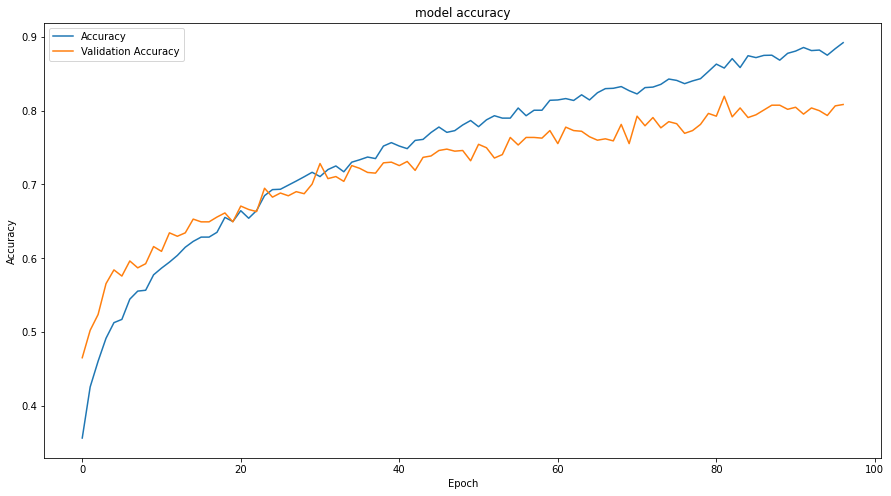

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(vgg_history.history["accuracy"])
plt.plot(vgg_history.history['val_accuracy'])
#plt.plot(vgg_history.history['loss'])
#plt.plot(vgg_history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

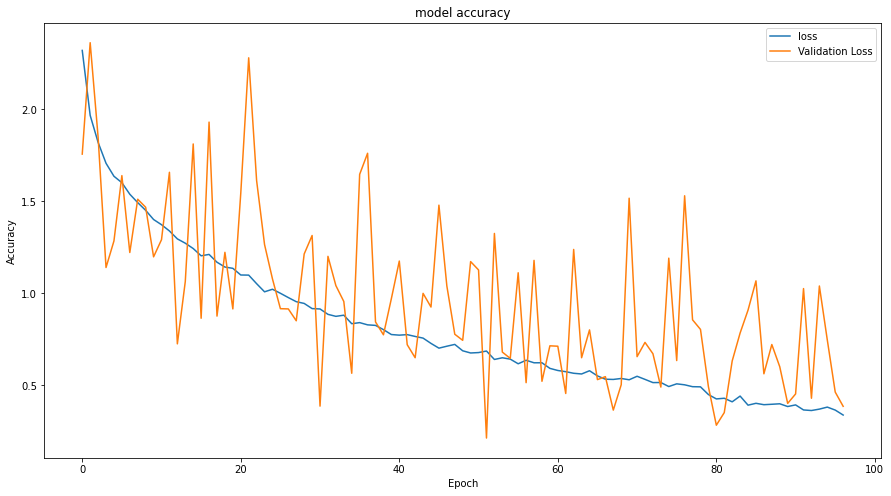

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
#plt.plot(vgg_history.history["accuracy"])
#plt.plot(vgg_history.history['val_accuracy'])
plt.plot(vgg_history.history['loss'])
plt.plot(vgg_history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

In [14]:
vgg_model.save("latest model22 try4.h5")

In [18]:
# Generate predictions
vgg_model.load_weights('latest model22 try4.h5') # initialize the best trained weights


# Evaluate the model
loss, acc = vgg_model.evaluate(test_generator, verbose=1)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

79/79 [==============================] - 19s 240ms/step
Untrained model, accuracy: 65.48%


# Try 5

In [7]:
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping

lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.6, patience=8, verbose=1, mode='max', min_lr=5e-5)
checkpoint = ModelCheckpoint('latest model22 try5.h5', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)
early_stop = EarlyStopping(monitor='val_accuracy',verbose=1,patience=15,mode='max',restore_best_weights=True)

In [8]:
from keras.applications.imagenet_utils import preprocess_input


train_datagen = ImageDataGenerator(rotation_range = 5, 
                                   shear_range = 0.02,
                                   zoom_range = 0.02, 
                                   samplewise_center=True, 
                                   samplewise_std_normalization= True, 
                                   brightness_range=[0.1, 0.7],
                                   width_shift_range=0.5, 
                                   height_shift_range=0.5,
                                   horizontal_flip=True, 
                                   vertical_flip=True,
                                   rescale=1/255.,              # normalize pixel values between 0-1
                                   preprocessing_function=preprocess_input) # VGG16 preprocessing

train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
valid_generator = train_datagen.flow(x_val, y_val, batch_size=32)


In [9]:
def create_model(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    """
    Compiles a model integrated with VGG16 pretrained layers
    
    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """
    
    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = VGG16(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)
    
    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(2048, activation='relu', kernel_initializer='he_uniform')(top_model)
    # top_model = Dropout(0.5)(top_model)
    top_model = Dense(2048, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [10]:
# Training Without Fine-Tuning

BATCH_SIZE =32
input_shape = (224, 224, 3)
optim_1 = Adam(learning_rate=0.0001)
n_classes=19


# First we'll train the model without Fine-tuning
vgg_model = create_model(input_shape, n_classes, optim_1, fine_tune=0)

# finAL run 2
vgg_history = vgg_model.fit(train_generator,
                            epochs=200,
                            validation_data=valid_generator,
                            callbacks=[lr_reduce, checkpoint, early_stop],
                            shuffle=True,
                            verbose=1)


Epoch 1/200
135/135 [==============================] - 61s 450ms/step - loss: 2.2169 - accuracy: 0.3721 - val_loss: 2.3372 - val_accuracy: 0.4800

Epoch 00001: val_accuracy improved from -inf to 0.48000, saving model to latest model22 try5.h5
Epoch 2/200
135/135 [==============================] - 60s 445ms/step - loss: 1.8312 - accuracy: 0.4592 - val_loss: 1.3009 - val_accuracy: 0.5153

Epoch 00002: val_accuracy improved from 0.48000 to 0.51535, saving model to latest model22 try5.h5
Epoch 3/200
135/135 [==============================] - 59s 438ms/step - loss: 1.7114 - accuracy: 0.4934 - val_loss: 1.9925 - val_accuracy: 0.5126

Epoch 00003: val_accuracy did not improve from 0.51535
Epoch 4/200
135/135 [==============================] - 62s 459ms/step - loss: 1.6085 - accuracy: 0.5238 - val_loss: 1.3400 - val_accuracy: 0.5572

Epoch 00004: val_accuracy improved from 0.51535 to 0.55721, saving model to latest model22 try5.h5
Epoch 5/200
135/135 [==============================] - 75s 556m

135/135 [==============================] - 69s 513ms/step - loss: 0.6987 - accuracy: 0.7832 - val_loss: 0.4940 - val_accuracy: 0.7312

Epoch 00038: val_accuracy did not improve from 0.73674
Epoch 39/200
135/135 [==============================] - 69s 509ms/step - loss: 0.6620 - accuracy: 0.7918 - val_loss: 0.9491 - val_accuracy: 0.7507

Epoch 00039: val_accuracy improved from 0.73674 to 0.75070, saving model to latest model22 try5.h5
Epoch 40/200
135/135 [==============================] - 69s 512ms/step - loss: 0.6633 - accuracy: 0.7862 - val_loss: 1.2221 - val_accuracy: 0.7470

Epoch 00040: val_accuracy did not improve from 0.75070
Epoch 41/200
135/135 [==============================] - 70s 519ms/step - loss: 0.6548 - accuracy: 0.7936 - val_loss: 0.7645 - val_accuracy: 0.7498

Epoch 00041: val_accuracy did not improve from 0.75070
Epoch 42/200
135/135 [==============================] - 70s 517ms/step - loss: 0.6172 - accuracy: 0.7983 - val_loss: 0.7735 - val_accuracy: 0.7377

Epoch 000

Training Accuracy: 92.1%
    
Validation Accuracy: 83.3%

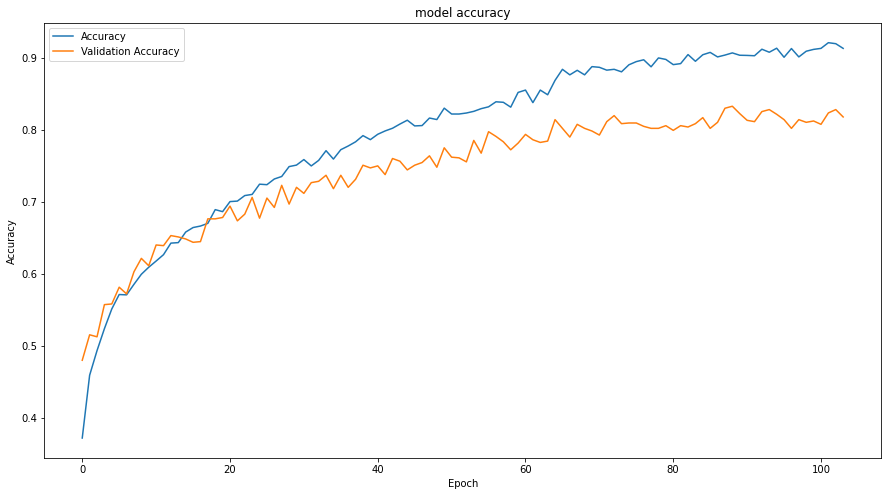

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(vgg_history.history["accuracy"])
plt.plot(vgg_history.history['val_accuracy'])
#plt.plot(vgg_history.history['loss'])
#plt.plot(vgg_history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

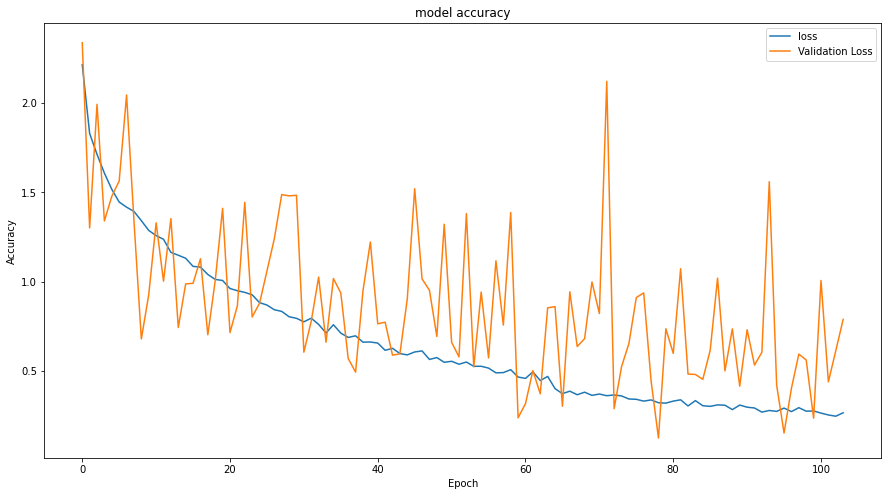

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
#plt.plot(vgg_history.history["accuracy"])
#plt.plot(vgg_history.history['val_accuracy'])
plt.plot(vgg_history.history['loss'])
plt.plot(vgg_history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

In [13]:
vgg_model.save("latest model22 try5.h5")

In [18]:
# Generate predictions
vgg_model.load_weights('latest model22 try5.h5') # initialize the best trained weights


# Evaluate the model
loss, acc = vgg_model.evaluate(test_generator, verbose=1)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

79/79 [==============================] - 19s 243ms/step
Untrained model, accuracy: 67.10%
